# Week 5 Peer Graded Assessment

Print six scatterplots (1 per district) showing the number of crimes (y-axis) per day (x-axis) for entries dated from January 1 to 10 in each specific district.

## Load, inspect and clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# inspect a few rows of the df to get relevant columns and minimize use of memory
inspector_df = pd.read_csv('crime.csv', nrows=5)

In [3]:
inspector_df.dtypes

cdatetime         object
address           object
district           int64
beat              object
grid               int64
crimedescr        object
ucr_ncic_code      int64
latitude         float64
longitude        float64
dtype: object

**Author's Note:** Only cdatetime, district, latitude and longitude will be loaded and converted

In [4]:
# make dict for columns and corresponding conversion
col_dict = {'cdatetime': 'str',
            'district':'int32',
            'latitude': 'float32',
            'longitude': 'float32',
           }

df_crime = pd.read_csv('crime.csv', usecols=col_dict.keys(),
                       dtype = col_dict,
                       parse_dates = ['cdatetime'],
                      )

df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   cdatetime  7584 non-null   datetime64[ns]
 1   district   7584 non-null   int32         
 2   latitude   7584 non-null   float32       
 3   longitude  7584 non-null   float32       
dtypes: datetime64[ns](1), float32(2), int32(1)
memory usage: 148.2 KB


There are no null values - non-null count per column is not less than number of entries. We can now filter for entries with month=1 and day 1 to 10

## Filter then aggregate data

In [5]:
df_filtered = df_crime[(df_crime['cdatetime'].dt.month==1) & (df_crime['cdatetime'].dt.day<= 10)].copy()
df_filtered.tail()

,cdatetime,district,latitude,longitude
2333,2006-01-10 23:35:00,5,38.438099,-121.429268
2334,2006-01-10 23:36:00,2,38.611118,-121.446198
2335,2006-01-10 23:57:00,2,38.634727,-121.447876
2336,2006-01-10 23:59:00,4,38.497086,-121.497307
2337,2006-01-10 23:59:00,4,38.533455,-121.519241


In [6]:
# inspect the duplicates, if any
df_filtered[df_filtered.duplicated(keep=False)].head()

,cdatetime,district,latitude,longitude
4,2006-01-01 00:00:00,2,38.637447,-121.384613
8,2006-01-01 00:00:00,2,38.637447,-121.384613
202,2006-01-01 19:00:00,2,38.617123,-121.458801
203,2006-01-01 19:00:00,2,38.617123,-121.458801
400,2006-01-03 00:01:00,3,38.573082,-121.507553


In [7]:
# drop duplicates
df_filtered.drop_duplicates(inplace=True)

In [8]:
# make a new df and aggregate by count
daily_crime = df_filtered.groupby([df_filtered['cdatetime'].dt.date, 'district']).agg({'latitude':pd.Series.count})

# rename latitude to Crime, reset indices
daily_crime.rename(columns = {'latitude':'Crimes'}, inplace=True)
daily_crime.reset_index(inplace=True)
daily_crime.head(10)

,cdatetime,district,Crimes
0,2006-01-01,1,40
1,2006-01-01,2,56
2,2006-01-01,3,52
3,2006-01-01,4,26
4,2006-01-01,5,35
5,2006-01-01,6,39
6,2006-01-02,1,21
7,2006-01-02,2,37
8,2006-01-02,3,33
9,2006-01-02,4,16


## Plotting the tallied crimes

In [9]:
unique_dist = df_filtered['district'].nunique()
print('Number of unique districts for plot: ',unique_dist)

Number of unique districts for plot:  6


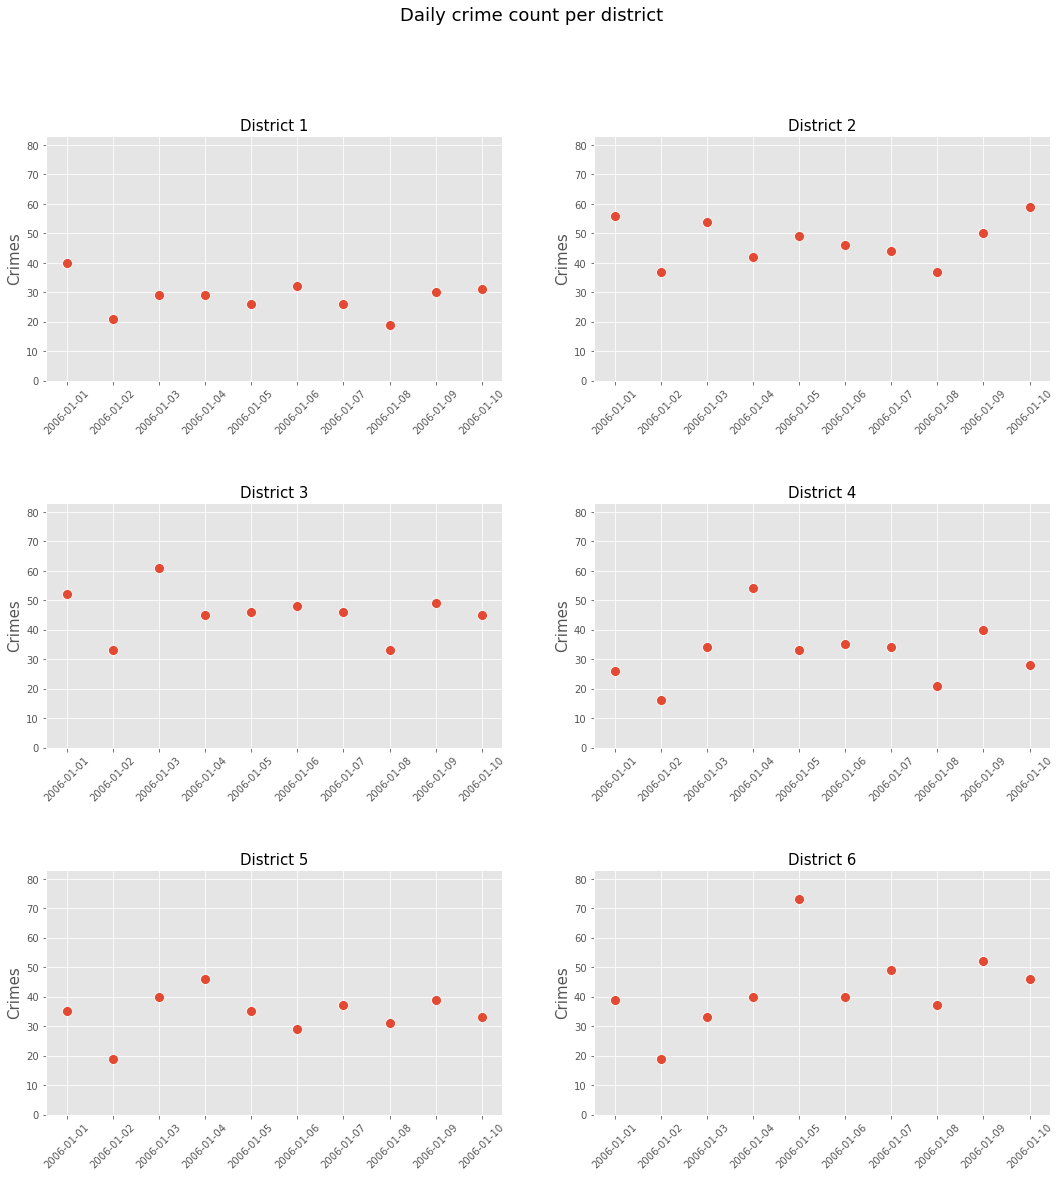

In [10]:
# fig, axs = plt.subplots(int(unique_dist/2), 2, figsize=(18,18))
plt.figure(figsize=(18,18))
plt.suptitle('Daily crime count per district', fontsize=18)
plt.style.use('ggplot')

# loop through districts and axes
for i, district in enumerate(range(1,unique_dist+1)):
    # set axis
    ax = plt.subplot(int(unique_dist/2), 2, i + 1)
    
    # plot on active axis
    sns.scatterplot(data = daily_crime[daily_crime['district']==district], 
                    x = daily_crime['cdatetime'],
                    y='Crimes',
                    s=100
                   )
    
    # format of axis
    ax.set_title(f'District {district}', fontsize=15)
    ax.set(xlabel=None)
    ax.set_ylim(0,daily_crime['Crimes'].max()+10)
    ax.yaxis.label.set_size(15)
    plt.xticks(rotation=45)
    plt.subplots_adjust(hspace=0.5)
    
plt.show()
